Top Recommended Cities:
          City         Country  SimilarityScore
0     brussels         belgium         0.688495
1    edinburgh  united kingdom         0.688495
2  kansas city   united states         0.688494
3        omaha   united states         0.688494
4     columbus   united states         0.688490


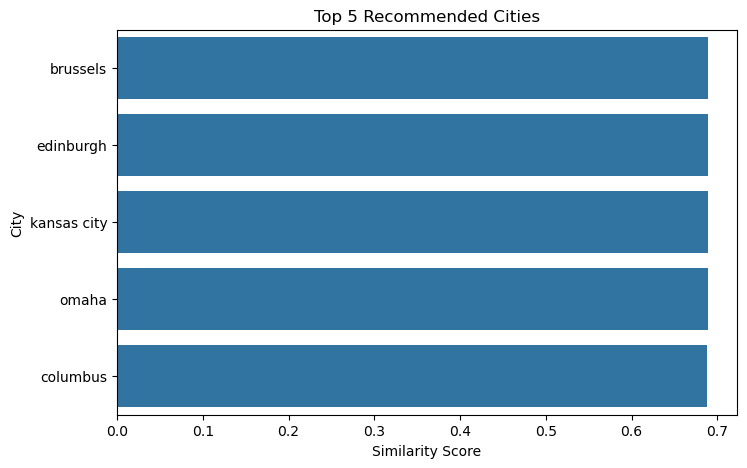

In [7]:
# 02_modeling.ipynb

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../data/merged_travel_data.csv')

# Step 1: Drop rows with missing AvgTemp_C or MonthlyCost (required)
clean_df = df.dropna(subset=['AvgTemp_C', 'MonthlyCost']).copy()

# Step 2: Handle missing Safety Index
# If all values are missing, assign default of 0.5
if clean_df['Safety Index'].isna().all():
    clean_df['Safety Index'] = 0.5
else:
    clean_df['Safety Index'] = clean_df['Safety Index'].fillna(clean_df['Safety Index'].mean())

# Step 3: Select and normalize features
features = ['AvgTemp_C', 'MonthlyCost', 'Safety Index']
city_features = clean_df[features].copy()

scaler = MinMaxScaler()
normalized_city_features = scaler.fit_transform(city_features)

# Step 4: Create city vectors with names
city_vectors = pd.DataFrame(normalized_city_features, columns=features)
city_vectors['City'] = clean_df['City'].values
city_vectors['Country'] = clean_df['Country'].values

# Step 5: Create sample user preference vector (scaled 0–1)
# Example: Likes warm climate, low cost, high safety
user_pref = np.array([[0.8, 0.3, 0.9]])

# Step 6: Calculate cosine similarity
similarities = cosine_similarity(user_pref, normalized_city_features)[0]

# Step 7: Get top 5 cities
top_indices = similarities.argsort()[-5:][::-1]
top_cities = clean_df.iloc[top_indices][['City', 'Country']]
top_cities['SimilarityScore'] = similarities[top_indices]

print("Top Recommended Cities:")
print(top_cities.reset_index(drop=True))

# Optional: Bar plot of results
plt.figure(figsize=(8, 5))
sns.barplot(x=top_cities['SimilarityScore'], y=top_cities['City'])
plt.title("Top 5 Recommended Cities")
plt.xlabel("Similarity Score")
plt.ylabel("City")
plt.show()
